#CSCI 8523 Fall 2022 - Phase I Modeling
#### Maitrayee Deka, Josh Spitzer-Resnick

---



---



In [1]:
# Installing required libraries
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
avg_ndvi = pd.read_csv('/content/drive/Shareddrives/CSCI 8523 F22/Data/modis_avgs.csv')
modis_bins_5 = pd.read_csv('/content/drive/Shareddrives/CSCI 8523 F22/Data/modis_bins_5.csv')
modis_bins_10 = pd.read_csv('/content/drive/Shareddrives/CSCI 8523 F22/Data/modis_bins_10.csv')
modis_bins_20 = pd.read_csv('/content/drive/Shareddrives/CSCI 8523 F22/Data/modis_bins_20.csv')

In [5]:
avg_ndvi

,year,yield_corn,yield_soybean,yield_wheat,49,65,81,97,113,129,145,161,177,193,209,225,241,257
0,2000,8.591008,2.561342,2.823927,0.299674,0.309376,0.339785,0.362275,0.406583,0.480128,0.502755,0.554111,0.662831,0.715622,0.722227,0.674268,0.621364,0.512532
1,2001,8.673266,2.663958,2.701927,0.274885,0.278908,0.295113,0.345418,0.392364,0.460058,0.519350,0.555456,0.668388,0.694679,0.719799,0.686991,0.642484,0.557208
2,2002,8.118010,2.556752,2.356827,0.269621,0.258074,0.298917,0.339352,0.400822,0.442546,0.473739,0.544178,0.615975,0.674909,0.688526,0.683328,0.647070,0.560741
3,2003,8.924730,2.276952,2.971268,0.207908,0.259988,0.319996,0.354274,0.418277,0.474236,0.510336,0.571130,0.635328,0.688302,0.701006,0.665738,0.612855,0.539163
4,2004,10.063628,2.840494,2.902680,0.257877,0.289724,0.314624,0.360246,0.416114,0.464241,0.510547,0.599773,0.646286,0.720695,0.727788,0.707510,0.672504,0.576721
5,2005,9.285273,2.896130,2.823190,0.256467,0.272238,0.319851,0.367782,0.421282,0.455442,0.511564,0.595489,0.679299,0.713899,0.705743,0.696155,0.654856,0.536098
6,2006,9.357833,2.881782,2.598712,0.255455,0.290278,0.317984,0.356646,0.418583,0.468456,0.498606,0.565122,0.651256,0.690523,0.682627,0.680580,0.655628,0.569127
7,2007,9.458417,2.806695,2.704637,0.221122,0.275828,0.347883,0.366519,0.411522,0.473419,0.541890,0.592407,0.681693,0.701437,0.698391,0.677150,0.638068,0.531598
8,2008,9.621053,2.671862,3.014640,0.224796,0.256002,0.292174,0.332168,0.383002,0.443516,0.486440,0.540970,0.613237,0.677245,0.711755,0.708011,0.672484,0.603466
9,2009,10.318039,2.959524,2.980516,0.239662,0.281166,0.312572,0.318933,0.378764,0.447520,0.485402,0.568330,0.628433,0.708474,0.731594,0.730101,0.692396,0.597850


In [6]:
all_years = list(avg_ndvi['year'].values)

In [7]:
avg_modis_day_cols = list(avg_ndvi.columns)[4:]

In [8]:
avg_ndvi

,year,yield_corn,yield_soybean,yield_wheat,49,65,81,97,113,129,145,161,177,193,209,225,241,257
0,2000,8.591008,2.561342,2.823927,0.299674,0.309376,0.339785,0.362275,0.406583,0.480128,0.502755,0.554111,0.662831,0.715622,0.722227,0.674268,0.621364,0.512532
1,2001,8.673266,2.663958,2.701927,0.274885,0.278908,0.295113,0.345418,0.392364,0.460058,0.519350,0.555456,0.668388,0.694679,0.719799,0.686991,0.642484,0.557208
2,2002,8.118010,2.556752,2.356827,0.269621,0.258074,0.298917,0.339352,0.400822,0.442546,0.473739,0.544178,0.615975,0.674909,0.688526,0.683328,0.647070,0.560741
3,2003,8.924730,2.276952,2.971268,0.207908,0.259988,0.319996,0.354274,0.418277,0.474236,0.510336,0.571130,0.635328,0.688302,0.701006,0.665738,0.612855,0.539163
4,2004,10.063628,2.840494,2.902680,0.257877,0.289724,0.314624,0.360246,0.416114,0.464241,0.510547,0.599773,0.646286,0.720695,0.727788,0.707510,0.672504,0.576721
5,2005,9.285273,2.896130,2.823190,0.256467,0.272238,0.319851,0.367782,0.421282,0.455442,0.511564,0.595489,0.679299,0.713899,0.705743,0.696155,0.654856,0.536098
6,2006,9.357833,2.881782,2.598712,0.255455,0.290278,0.317984,0.356646,0.418583,0.468456,0.498606,0.565122,0.651256,0.690523,0.682627,0.680580,0.655628,0.569127
7,2007,9.458417,2.806695,2.704637,0.221122,0.275828,0.347883,0.366519,0.411522,0.473419,0.541890,0.592407,0.681693,0.701437,0.698391,0.677150,0.638068,0.531598
8,2008,9.621053,2.671862,3.014640,0.224796,0.256002,0.292174,0.332168,0.383002,0.443516,0.486440,0.540970,0.613237,0.677245,0.711755,0.708011,0.672484,0.603466
9,2009,10.318039,2.959524,2.980516,0.239662,0.281166,0.312572,0.318933,0.378764,0.447520,0.485402,0.568330,0.628433,0.708474,0.731594,0.730101,0.692396,0.597850


## **ANN - Corn Average MODIS**

In [9]:
predictions_corn_avg_ndvi = []
for year in all_years:
  print("YEAR ", year )
  test_df = avg_ndvi.loc[avg_ndvi['year'] == year]
  remaining_df = avg_ndvi.loc[(avg_ndvi.year != year)]
  
  # Separate Target Variable and Predictor Variables
  TargetVariable=['yield_corn']
  Predictors = avg_modis_day_cols +  ['year']
  
  y_train = remaining_df[TargetVariable].values
  X_train = remaining_df[Predictors].values

  y_test = test_df[TargetVariable].values
  X_test = test_df[Predictors].values
  
  ### Standardization of data ###
  PredictorScaler_train = StandardScaler()
  TargetVarScaler_train = StandardScaler()

  
  # Storing the fit object for later reference
  PredictorScalerFit_train = PredictorScaler_train.fit(X_train)
  TargetVarScalerFit_train = TargetVarScaler_train.fit(y_train)

  
  # Generating the standardized values of X and y
  X_train = PredictorScalerFit_train.transform(X_train)
  y_train = TargetVarScalerFit_train.transform(y_train)

  X_test = PredictorScalerFit_train.transform(X_test)
  y_test = TargetVarScalerFit_train.transform(y_test)
  
  
  # create ANN model
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=5, input_dim=15, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = 5, epochs = 500, verbose=1)

  # Generating Predictions on testing data
  Predictions=model.predict(X_test)
  
  # Scaling the predicted Price data back to original price scale
  Predictions=TargetVarScalerFit_train.inverse_transform(Predictions)
  
  predictions_corn_avg_ndvi.append(Predictions[0][0])

Streaming output truncated to the last 5000 lines.
5/5 [==============================] - 0s 2ms/step - loss: 0.9954
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9934
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9909
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9874
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9840
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9776
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9715
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9638
Epoch 13/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9527
Epoch 14/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9398
Epoch 15/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9239
Epoch 16/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9057
Epoch 17/500
5/5 [

1/1 [==============================] - 0s 70ms/step
YEAR  2005
Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 1.0019
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 1.0009
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 1.0001
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9994
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9986
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9975
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9961
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9942
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9914
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9880
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9832
Epoch 12/500
5/5 [==============================] - 0s 4ms/step - loss: 0.976

Streaming output truncated to the last 5000 lines.
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9984
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9974
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9962
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9942
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9922
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9893
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9864
Epoch 13/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9818
Epoch 14/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9769
Epoch 15/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9702
Epoch 16/500
5/5 [==============================] - 0s 5ms/step - loss: 0.9625
Epoch 17/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9515
Epoch

In [10]:
predictions_corn_avg_ndvi

[7.9015503,
 9.308527,
 8.216766,
 8.584718,
 9.573735,
 9.082197,
 8.911426,
 9.45071,
 9.533799,
 9.894957,
 9.5622225,
 9.747302,
 8.405713,
 9.223179,
 11.354733,
 10.024655,
 11.44309,
 10.468425,
 10.096751,
 10.780261,
 11.176948,
 11.008258,
 10.564652]

In [11]:
avg_ndvi_predicted_corn = avg_ndvi.copy()

In [12]:
avg_ndvi_predicted_corn = avg_ndvi_predicted_corn[['year', 'yield_corn']]

In [13]:
avg_ndvi_predicted_corn['yield_corn_predicted'] = predictions_corn_avg_ndvi

In [14]:
avg_ndvi_predicted_corn

,year,yield_corn,yield_corn_predicted
0,2000,8.591008,7.901550
1,2001,8.673266,9.308527
2,2002,8.118010,8.216766
3,2003,8.924730,8.584718
4,2004,10.063628,9.573735
5,2005,9.285273,9.082197
6,2006,9.357833,8.911426
7,2007,9.458417,9.450710
8,2008,9.621053,9.533799
9,2009,10.318039,9.894957


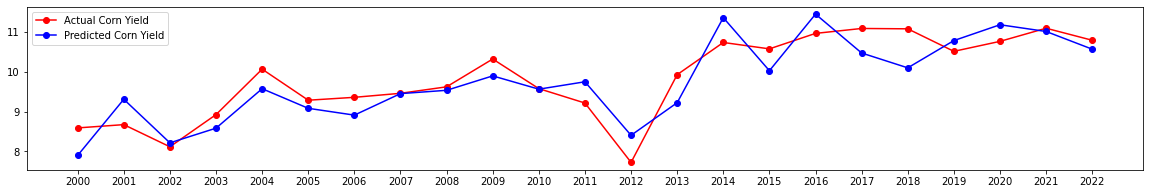

In [15]:
plt.rcParams["figure.figsize"] = (20,3)

plt.plot(avg_ndvi_predicted_corn['year'], avg_ndvi_predicted_corn['yield_corn'], color='red', marker='o', label='Actual Corn Yield')
plt.plot(avg_ndvi_predicted_corn['year'], avg_ndvi_predicted_corn['yield_corn_predicted'], color='blue', marker='o', label = 'Predicted Corn Yield')

plt.legend()
plt.xticks(np.arange(min(avg_ndvi_predicted_corn['year']), max(avg_ndvi_predicted_corn['year'])+1, 1.0))
plt.show()

## **ANN - SB Average MODIS**

In [16]:
predictions_sb_avg_ndvi = []

for year in all_years:
  print("YEAR ", year )
  test_df = avg_ndvi.loc[avg_ndvi['year'] == year]
  remaining_df = avg_ndvi.loc[(avg_ndvi.year != year)]
  # train_df = remaining_df[:11]
  # validation_df = remaining_df[11:]

  # Separate Target Variable and Predictor Variables
  TargetVariable=['yield_soybean']
  Predictors = avg_modis_day_cols + ['year']
  
  y_train = remaining_df[TargetVariable].values
  X_train = remaining_df[Predictors].values

  y_test = test_df[TargetVariable].values
  X_test = test_df[Predictors].values
  
  ### Sandardization of data ###
  PredictorScaler_train = StandardScaler()
  TargetVarScaler_train = StandardScaler()

  
  # Storing the fit object for later reference
  PredictorScalerFit_train = PredictorScaler_train.fit(X_train)
  TargetVarScalerFit_train = TargetVarScaler_train.fit(y_train)
  
  # Generating the standardized values of X and y
  X_train = PredictorScalerFit_train.transform(X_train)
  y_train = TargetVarScalerFit_train.transform(y_train)

  X_test = PredictorScalerFit_train.transform(X_test)
  y_test = TargetVarScalerFit_train.transform(y_test)
  
  # create ANN model
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=5, input_dim=15, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = 5, epochs = 400, verbose=1)

  # Generating Predictions on testing data
  Predictions=model.predict(X_test)
  
  # Scaling the predicted Price data back to original price scale
  Predictions=TargetVarScalerFit_train.inverse_transform(Predictions)
  
  predictions_sb_avg_ndvi.append(Predictions[0][0])

Streaming output truncated to the last 5000 lines.
Epoch 308/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 309/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0903
Epoch 310/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 311/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 312/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0905
Epoch 313/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0905
Epoch 314/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 315/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0905
Epoch 316/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0903
Epoch 317/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 318/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 319/400
5/5 [==============================] - 0s 2ms/step - lo

In [17]:
avg_ndvi_predicted_sb = avg_ndvi.copy()
avg_ndvi_predicted_sb = avg_ndvi_predicted_sb[['year', 'yield_soybean']]
avg_ndvi_predicted_sb['yield_soybean_predicted'] = predictions_sb_avg_ndvi

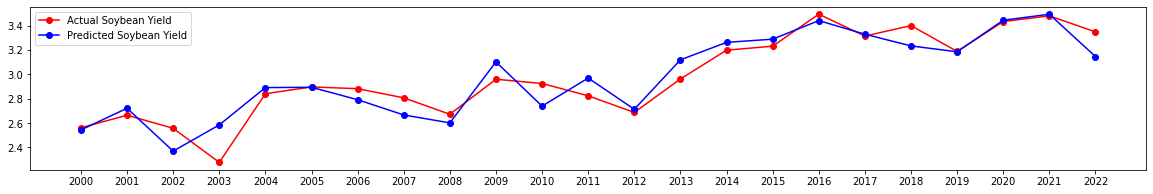

In [18]:
# plt.rcParams["figure.figsize"] = (20,3)

plt.plot(avg_ndvi_predicted_sb['year'], avg_ndvi_predicted_sb['yield_soybean'], color='red', marker='o', label='Actual Soybean Yield')
plt.plot(avg_ndvi_predicted_sb['year'], avg_ndvi_predicted_sb['yield_soybean_predicted'], color='blue', marker='o', label = 'Predicted Soybean Yield')

plt.legend()
plt.xticks(np.arange(min(avg_ndvi_predicted_sb['year']), max(avg_ndvi_predicted_sb['year'])+1, 1.0))
plt.show()

## **ANN - Wheat Average MODIS**

In [ ]:
predictions_wheat_avg_ndvi = []

for year in all_years:
  print("YEAR ", year )
  test_df = avg_ndvi.loc[avg_ndvi['year'] == year]
  remaining_df = avg_ndvi.loc[(avg_ndvi.year != year)]
  # train_df = remaining_df[:11]
  # validation_df = remaining_df[11:]

  # Separate Target Variable and Predictor Variables
  TargetVariable=['yield_wheat']
  Predictors = avg_modis_day_cols + ['year']
  
  y_train = remaining_df[TargetVariable].values
  X_train = remaining_df[Predictors].values

  y_test = test_df[TargetVariable].values
  X_test = test_df[Predictors].values
  
  ### Sandardization of data ###
  PredictorScaler_train = StandardScaler()
  TargetVarScaler_train = StandardScaler()
  
  # Storing the fit object for later reference
  PredictorScalerFit_train = PredictorScaler_train.fit(X_train)
  TargetVarScalerFit_train = TargetVarScaler_train.fit(y_train)

  # Generating the standardized values of X and y
  X_train = PredictorScalerFit_train.transform(X_train)
  y_train = TargetVarScalerFit_train.transform(y_train)

  X_test = PredictorScalerFit_train.transform(X_test)
  y_test = TargetVarScalerFit_train.transform(y_test)
  
  # create ANN model
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=5, input_dim=15, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = 10, epochs = 400, verbose=1)

  # Generating Predictions on testing data
  Predictions=model.predict(X_test)
  
  # Scaling the predicted Price data back to original price scale
  Predictions=TargetVarScalerFit_train.inverse_transform(Predictions)
  
  predictions_wheat_avg_ndvi.append(Predictions[0][0])

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 6ms/step - loss: 0.0538
Epoch 259/400
3/3 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 260/400
3/3 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 261/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0518
Epoch 262/400
3/3 [==============================] - 0s 2ms/step - loss: 0.0507
Epoch 263/400
3/3 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 264/400
3/3 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 265/400
3/3 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 266/400
3/3 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 267/400
3/3 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 268/400
3/3 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 269/400
3/3 [==============================] - 0s 2ms/step - loss: 0.0465
Epo

In [20]:
avg_ndvi_predicted_wheat = avg_ndvi.copy()
avg_ndvi_predicted_wheat = avg_ndvi_predicted_wheat[['year', 'yield_wheat']]
avg_ndvi_predicted_wheat['yield_wheat_predicted'] = predictions_wheat_avg_ndvi

In [21]:
plt.plot(avg_ndvi_predicted_wheat['year'], avg_ndvi_predicted_wheat['yield_wheat'], color='red', marker='o', label='Actual Wheat Yield')
plt.plot(avg_ndvi_predicted_wheat['year'], avg_ndvi_predicted_wheat['yield_wheat_predicted'], color='blue', marker='o', label = 'Predicted Wheat Yield')

plt.legend()
plt.xticks(np.arange(min(avg_ndvi_predicted_wheat['year']), max(avg_ndvi_predicted_wheat['year'])+1, 1.0))
plt.show()